<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 03 - Classification: AirQuality</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
Maxime Zanella (maxime.zanella@uclouvain.be)<br>
Florine Thiry (florine.thiry@uclouvain.be)<br>
Baptiste Standaert (baptiste.standaert@uclouvain.be)<br>
Antoine Legat (antoine.legat@uclouvain.be)<br>
<div style="text-align: right"> Version 2022</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on the <b>9 December 2022 at 22h00</b>.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups,...) must be clearly indicated!</b>
-  This notebook (with the "ipynb" extension) file, the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
- Only the PDF report will be graded on content and quality of the text / figures. <br><br>

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>

<font size=5 color=#009999> <b>CONTEXT & OBJECTIVE </b> </font> <br>
    

### Context

The air in cities is polluted by human activities. Vehicular emissions, heating systems, industries... You probably remember those times when the air is so polluted that it is recommended to stay at home, and not do too much sport outside. It is often related to specific weather conditions (e.g. not enough wind to blow air pollution away).

Besides, one could wonder: is it healthy to go running in a city? Do the benefits of sport balance the fact that you are breathing polluted air? Studies show that the answer is yes, as long as you avoid busy roads with dense traffic.

Air quality is a crucial issue in our modern society, and its effect is poorly anchored in common knowledge. As engineers of tomorrow, you must be aware of the impact of thermic engines and industries on human health.

![](https://api.brusselstimes.com/wp-content/uploads/2022/01/763-45.jpeg)

In this hackathon, we will learn to quantify air quality. Wikipedia says that smog (or smoke fog) is composed of nitrogen oxides, sulfur oxide, ozone, smoke and other particulates. How to quantify from those different features?

People use the Air Quality Index (AQI). This is a natural number running from 0 to 500+, the lower the better. AQI accounts for the concentration of important pollutants and particles. We usually distinguish 6 classes of air quality, from good to severe (see table below). In this hackathon, we will classify the AQI between only 2 classes: good or bad.


![](https://i.imgur.com/XmnE0rT.png)
 


### Objectives

The project aims to train a binary classifier to estimate the air quality index (AQI) based on the air concentration of certain pollutants. Note that the AQI is initially defined as a natural number between 0 and 500+. However, to better address the problem, we propose to classify the air quality as poor (labeled 0) or good (labeled 1). The next part of the document will guide you in this process.  

### Notebook structure
This notebook is organized into four parts. Each of them assesses one fundamental step to solve our problem and provides one visualization tool to gain some understanding:
* PART 1 - PREPROCESSING
   - 1.1 - Import the dataset
   - 1.2 - Split the dataset
    <br><br>
* PART 2 - EXPLORATORY DATA ANALYSIS 
   - 2.1 - Binary targets
   - 2.2 - Cyclical features
   - 2.3 - Correlation matrix
   - 2.4 - Features selection
   - 2.5 - Data scaling and normalization
    <br><br>
* PART 3 - MODEL SELECTION
   - 3.1 - Precision, recall and F1-score
   - 3.2 - Model evaluation
   - 3.3 - Model selection and parameters tuning
   - 3.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 4 - MODEL TESTING
   - 4.1 - Error computation on the test set
   
We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings. <br><b>Take advantage of this aspect to divide the work between all team members!</b> <br><br> 

In [1]:
## warnings off
import warnings
warnings.filterwarnings("ignore")

<br><font size=7 color=#009999> <b>PART 1 - DATA LOADING</b> </font> <br><br>

<font size=4 color=#009999> <br> 1.0/1 DISCOVER THE DATASET </font> <br>

**Import** `gas_measurements.csv` using `read_csv` [<sup>1</sup>](#fn1) from pandas and **obtain** a brief description of the data (size, variables type, missing values, etc.).  



<span id="fn1"> [1] N.B : the separator in the csv file is ',' and not the default comma (see the *`sep`* argument).</span>

<div class="alert alert-warning">
    <b>[Question 1.0]</b> Describe, briefly, your dataset (size, variables type, missing values, etc.).<br>
</div> 

In [2]:
"""
CELL N°1 : Import the dataset using pd.read_csv function 

@pre: filename 'gas_measurements.csv', located in the same folder as this jupyter
@post: variable `df` containing the dataframe
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#############################
# Start : 
#############################


df = pd.read_csv('gas_measurements.csv', sep = ',')

df = df.sample(frac = 1).reset_index(drop = True)
df.info()

##########################
# End : 
#########################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44769 entries, 0 to 44768
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    44769 non-null  int64  
 1   BigUrbanCity  44769 non-null  int64  
 2   PM10          44309 non-null  float64
 3   PM2_5         43540 non-null  float64
 4   SO2           21600 non-null  float64
 5   NOx           42499 non-null  float64
 6   NH3           21772 non-null  float64
 7   CO            43814 non-null  float64
 8   O3            44081 non-null  float64
 9   Datetime      44769 non-null  object 
 10  AQI           44769 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 3.8+ MB


<div class="alert alert-warning">
    <b>[Question 1.1]</b> Based on your observations, justify and proceed to the <i>a priori</i> deletion of <b>two</b> troublesome features. 
</div> 

<i>HINT</i>: one usually decides of a <i>threshold</i> $\tau\in [0,1[$ of the allowed proportion of missing data within a given feature...

<b>NOTE</b>: there will remain other features with missing data.. it is not a big deal as soon as the proportion of missing data stays <i>reasonable</i>. In what concerns these features with missing data that are not discarded here, we will proceed with a <i>fill-in</i> operation later on.

In [3]:
#############################
# Start : 
#############################

# We only want to keep features with < tau proportion of missing data
tau = 0.5

# Drop features with > tau proportion of missing values
df = df[df.columns[df.isnull().mean() < tau]]
df.info()
df.head(10)

##########################
# End : 
#########################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44769 entries, 0 to 44768
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    44769 non-null  int64  
 1   BigUrbanCity  44769 non-null  int64  
 2   PM10          44309 non-null  float64
 3   PM2_5         43540 non-null  float64
 4   NOx           42499 non-null  float64
 5   CO            43814 non-null  float64
 6   O3            44081 non-null  float64
 7   Datetime      44769 non-null  object 
 8   AQI           44769 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB


,Unnamed: 0,BigUrbanCity,PM10,PM2_5,NOx,CO,O3,Datetime,AQI
0,529,0,178.076087,104.619565,32.282083,0.13,131.80,2017-12-18 13:00:00,Poor
1,39869,1,192.953750,76.545000,87.449167,1.35,4.84,2020-03-21 06:00:00,Moderate
2,32511,1,159.266250,36.891250,19.881667,1.61,41.39,2019-04-14 00:00:00,Moderate
3,5989,0,80.843750,23.083333,23.336250,2.08,53.90,2018-09-04 17:00:00,Moderate
4,20632,1,210.299167,139.383750,47.658333,1.41,62.16,2017-11-23 17:00:00,Very Poor
5,11823,0,40.687500,17.604167,18.865833,0.56,36.85,2019-06-22 09:00:00,Good
6,10571,0,38.521739,10.717391,9.815652,0.61,24.50,2019-04-20 03:00:00,Good
7,18171,0,43.572917,16.532609,4.534167,NaN,18.25,2020-05-11 09:00:00,Good
8,41901,1,116.691905,50.438571,32.785238,0.68,34.26,2020-06-13 22:00:00,Moderate
9,27731,1,137.673333,46.818333,0.053333,0.95,46.08,2018-09-18 14:00:00,Moderate


<font size=4 color=#009999> <br> 1.2 - SPLIT THE DATASET </font> <br> 

Data science projects begin by the division the **whole** dataset into a **training** and a **test** set. The subsequent analysis and decisions (i.e. features selection, pre-processing, model selection, etc.) are, then, conducted only on the _training set_ to stay statistically significant during the **testing phase**. The latter will, thus, only be conducted on the _test set_.  

We invite you then to **split** [<sup>2</sup>](#fn2) the dataset into a _training_ and a _test_. The proportion of each subset is at **your own discretion**.


<span id="fn2"> [2] N.B. Set the seed of your random split with `random_state = 42` to obtain reproducible results.</span>



<div class="alert alert-warning">
    <b>[Question 1.2]</b> What are the drawbacks (if any) of choosing a small test set (in proportion)? On the contrary, what are the consequences (if any) of a relatively large testing set (in proportion)? <br>
</div> 

In [4]:
"""
CELL N°2 : SPLIT THE DATASET    

@pre:  'df' a pandas frame with the entire dataset
@post: 2 pandas frames with the train and test sets
"""

import sklearn.model_selection as ms

#############################
# Start : 
#############################

# Taken from
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
train_df, test_df = ms.train_test_split(df, test_size = 0.1, random_state = 42)

train_df.info()
test_df.info()

##########################
# 
#########################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40292 entries, 16837 to 15795
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    40292 non-null  int64  
 1   BigUrbanCity  40292 non-null  int64  
 2   PM10          39871 non-null  float64
 3   PM2_5         39182 non-null  float64
 4   NOx           38249 non-null  float64
 5   CO            39430 non-null  float64
 6   O3            39664 non-null  float64
 7   Datetime      40292 non-null  object 
 8   AQI           40292 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4477 entries, 40452 to 9062
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4477 non-null   int64  
 1   BigUrbanCity  4477 non-null   int64  
 2   PM10          4438 non-null   float64
 3   PM2_5         4358 non-

<br>

<br><font size=7 color=#009999> <b>PART 2 - EXPLORATORY DATA ANALYSIS </b> </font> <br><br>


We **analyze** the distribution of the features _AQI_ in the binary scenario. Namely, air quality is considered either <ol> <li>**bad** (AQI : Poor, Very Poor, Severe) </li> <li>**good** (AQI : Good, Satisfactory, Moderate)</li> </ol>

We conduct the analysis on the <i>training set</i>, avoiding therefore any modelling decision based on _unseen_ data (<i>test set</i>). In most cases, we assume that the distribution of this latter set stays similar to the <i>training set</i>.

<font size=4 color=#009999> <br> 2.1. Binary targets  </font> <br>

<div class="alert alert-warning">
    <b>[Question 2.1]</b> Are the binary classes balanced? What are the proportions of data in each class? Briefly, justify your answer and add a visualization.
</div> 


In [5]:
print(train_df['AQI'].unique())

['Moderate' 'Satisfactory' 'Good' 'Poor' 'Very Poor' 'Severe']


<AxesSubplot: ylabel='AQI_binary'>

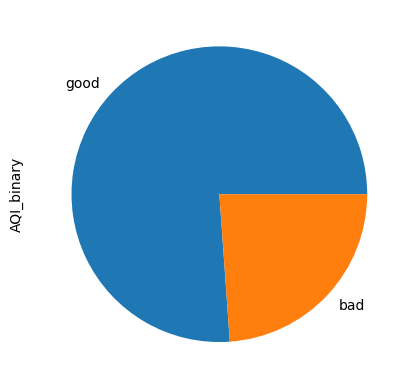

In [6]:
"""
CELL N°3 : Binary targets: proportion and binarization
   
@pre:  Training dataframe  
@post: Proportion of each binary class in this train set, a pie chart representing it, 
a modified training dataframe with a new column 'AQI_binary' containing the binary targets 
"""

#############################
# Start :
#############################

# Mapping dictionary
mapping = {
    'Good': 'good', 'Satisfactory': 'good', 'Moderate': 'good',
    'Poor': 'bad', 'Very Poor': 'bad', 'Severe': 'bad'
}

train_df['AQI_binary'] = train_df['AQI'].map(mapping)
test_df['AQI_binary'] = test_df['AQI'].map(mapping)

# Plot distribution of binary targets
train_df['AQI_binary'].value_counts().plot.pie(y = 'AQI_binary')

##########################
# End : 
#########################

<font size=4 color=#009999> 2.2. Cyclical features </font> <br>

<b>Establish</b> a <i>cyclical</i> feature transformation and store the new features in the corresponding variables. 

<span id="fn3"> Many features are cyclical in nature. One example is time: months, days, weekdays, hours, minutes, seconds etc. are all cyclical.</span> 

<div class="alert alert-warning">
    <b>[Question 2.2]</b> Explain your transformation and the need to use cyclical features in some cases. What is the point to not simply encode features in a categorical way (e.g. morning=0, afternoon=1, evening=2, night=3)? 
</div>  

<i>HINT</i>: what happens between 23:00:00 and 00:00:00 ?

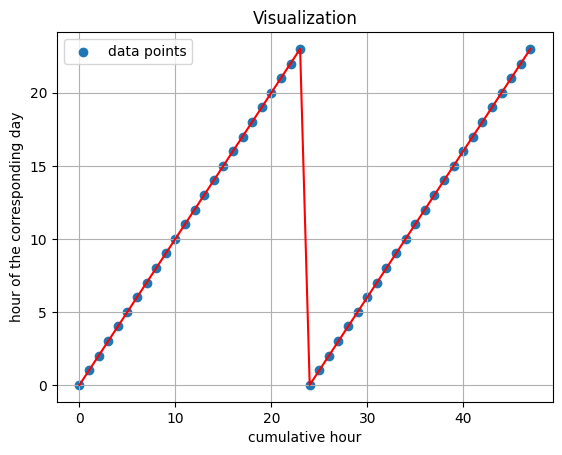

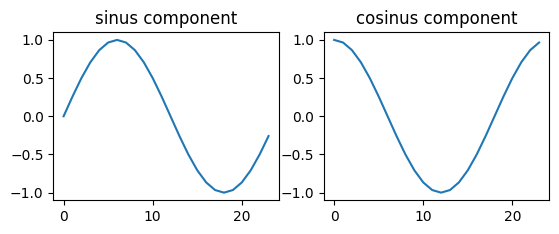

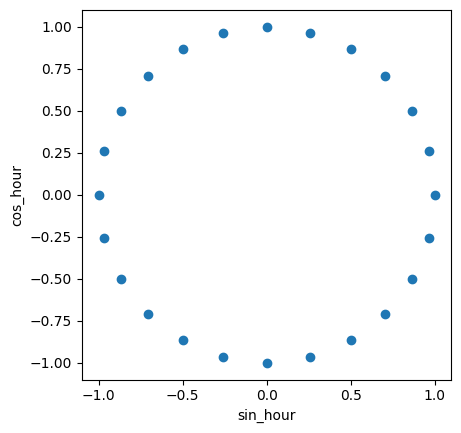

In [7]:
"""
HINT CELL : This cell is intended to help you understand CELL N°4 (bis) and to answer the corresponding questions. 
Observe how the final plot looks like a clock ;)
"""

hours = [i for i in range(24)]*2
plt.scatter(np.arange(len(hours)),hours,label='data points')
plt.plot(np.arange(len(hours)),hours,color='red')
plt.grid()
plt.title('Visualization')
plt.legend()
plt.ylabel('hour of the corresponding day')
plt.xlabel('cumulative hour')
plt.show()


sin_hours = np.sin(2 * np.pi * np.array(hours)/24.0)
cos_hours = np.cos(2 * np.pi * np.array(hours)/24.0)

plt.subplot(2,2,1)
plt.plot(hours[0:24], sin_hours[0:24])
plt.title('sinus component')
plt.subplot(2,2,2)
plt.plot(hours[0:24], cos_hours[0:24])
plt.title('cosinus component')

ax, fig = plt.subplots()
fig.set_aspect('equal')
plt.xlabel('sin_hour')
plt.ylabel('cos_hour')
plt.scatter(sin_hours[0:24], cos_hours[0:24])
plt.show()


In [8]:
"""
CELL N°4 : Time feature conversion
   
@pre:  Training and testing dataframe
@post: Training and testing dataframe with a new colum 'hour' filled with the corresponding hour of the day (integer)

DO NOT FORGET TO APPLY TRANSFORMATIONS TO BOTH data_train AND data_test
"""
from datetime import datetime

def datetime_to_hour(date_time):
    hours = []
    for date in date_time:
        datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        hours.append(datetime_obj.hour)
    return hours

#############################
# Start : 
#############################

train_df['hour'] = datetime_to_hour(train_df['Datetime'])
test_df['hour'] = datetime_to_hour(test_df['Datetime'])

##########################
# End : 
########################

In [9]:
"""
CELL N°4 (BIS) : Cyclical features transformation
   
@pre:  Training and testing dataframe
@post: Training and testing dataframe with two new columns 'sin_hour' and 'cos_hour' with hours of the day encoded in a cyclical way
       
Afterwards, you can drop the column 'Datetime', useless from now on :) 

DO NOT FORGET TO APPLY TRANSFORMATIONS TO BOTH data_train AND data_test
"""

def categorical_to_cyclical(features, max_value = 24):
    sin_features = np.sin(2 * np.pi * features / max_value)
    cos_features = np.cos(2 * np.pi * features / max_value)
    return (sin_features, cos_features)

#############################
# Start : 
#############################

# Add the cyclical columns
train_df['sin_hour'], train_df['cos_hour'] = categorical_to_cyclical(train_df['hour'])
test_df['sin_hour'], test_df['cos_hour'] = categorical_to_cyclical(test_df['hour'])

# Drop the 'Datetime' column
train_df.drop('Datetime', axis = 1, inplace = True)
test_df.drop('Datetime', axis = 1, inplace = True)

##########################
# End : 
########################

<font size=4 color=#009999> <br> 2.3. Correlation matrix </font> <br>

__Compute__ and __plot__ the correlation matrix. For the plot, you can use the function `imshow` or `matshow` from `matplotlib`.

<div class="alert alert-warning">
    <b>[Question 2.3]</b> With the help of your plot and numerical results of cell 4, write your observations down.  <br
                                                                                                                
</div> 

[Text(0, 0.0, 'Unnamed: 0'),
 Text(0, 1.0, 'BigUrbanCity'),
 Text(0, 2.0, 'PM10'),
 Text(0, 3.0, 'PM2_5'),
 Text(0, 4.0, 'NOx'),
 Text(0, 5.0, 'CO'),
 Text(0, 6.0, 'O3'),
 Text(0, 7.0, 'AQI_binary'),
 Text(0, 8.0, 'hour'),
 Text(0, 9.0, 'sin_hour'),
 Text(0, 10.0, 'cos_hour')]

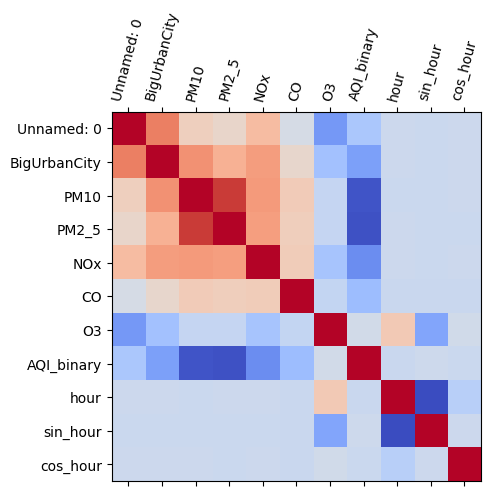

In [10]:
"""
CELL N°5 : CORRELATION MATRIX
   
@pre:  Training dataframe  
@post: The correlation matrix between the features (target incl.) and its plot    
"""


#############################
# Start : 
#############################

numerical_train_df = train_df.copy()
numerical_train_df.drop('AQI', axis = 1, inplace = True)
numerical_train_df['AQI_binary'].replace(to_replace = ['good', 'bad'], value = [1, 0], inplace = True)

corr_matrix = numerical_train_df.corr()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
mat = ax.matshow(corr_matrix, cmap = 'coolwarm')
plt.xticks(np.arange(0, len(numerical_train_df.columns), 1.0), rotation = 75)
plt.yticks(np.arange(0, len(numerical_train_df.columns), 1.0))
ax.set_xticklabels(numerical_train_df.columns)
ax.set_yticklabels(numerical_train_df.columns)

##########################
# End : 
#########################

              Unnamed: 0  BigUrbanCity      PM10     PM2_5       NOx  \
Unnamed: 0      1.000000      0.664808  0.256974  0.195168  0.377848   
BigUrbanCity    0.664808      1.000000  0.587232  0.441627  0.535236   
PM10            0.256974      0.587232  1.000000  0.895235  0.555018   
PM2_5           0.195168      0.441627  0.895235  1.000000  0.528399   
NOx             0.377848      0.535236  0.555018  0.528399  1.000000   
CO              0.057275      0.190113  0.279074  0.260821  0.271526   
O3             -0.444872     -0.214657 -0.036368 -0.034151 -0.195792   
AQI_binary     -0.176846     -0.409300 -0.739057 -0.749496 -0.499565   
hour            0.003987      0.003129  0.000451  0.000713  0.000900   
sin_hour       -0.004646     -0.004052 -0.002002 -0.001051 -0.002086   
cos_hour        0.005941      0.004242  0.001764 -0.001391  0.002003   

                    CO        O3  AQI_binary      hour  sin_hour  cos_hour  
Unnamed: 0    0.057275 -0.444872   -0.176846  0.003987 -0.

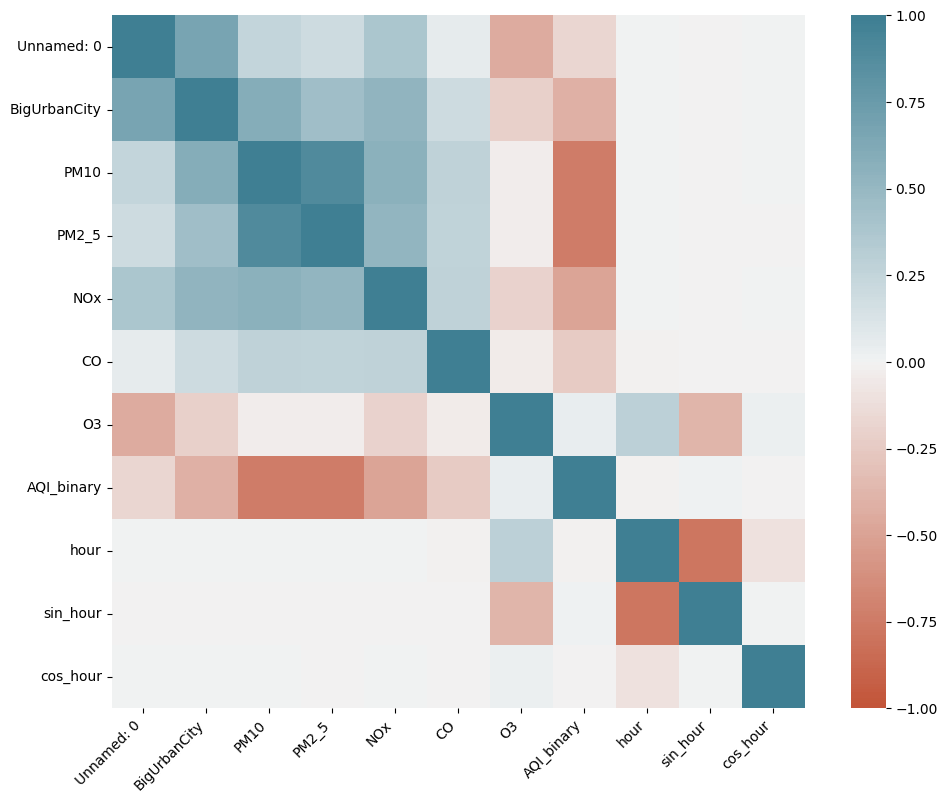

In [11]:
# I prefer the seaborn plots
import seaborn as sns

corr_matrix = numerical_train_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

plt.figure(figsize = (12, 9))
# Code adapted from the first snipet found at https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
ax = sns.heatmap(
    corr_matrix,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);
print(corr_matrix)

<font size=4 color=#009999> 2.4. Features Selection </font> <br>

<b>Establish</b> a feature selection strategy and store the feature names in a list. 

N.B. Selection of the $n$ first correlated features and/or setting of a correlation threshold or any other rule. <br>Furthermore, investigate on <i>redundant</i> features which can be removed as well.</span> 

<div class="alert alert-warning">
    <b>[Question 2.4]</b> Explain your selection strategy. 
    Is it appropriate to use the correlation matrix to select (or not) cyclical features?
</div> 

In [12]:
"""
CELL N°6 : Features selection 
   
@pre:  data_train's correlation matrix: correl_mat (see CELL  N°5)
@post: a list 'feature_names' with the names of the selected features, display of each explanatory feature vs. binary target
"""

#############################
# Start : Only for the TA's
#############################

data_train = train_df.copy()
data_test = test_df.copy()

# PM10 and PM2_5 are strongly correlated so we drop one of the two
data_train.drop('PM10', axis = 1, inplace = True)

# Our threshold to drop features
corr_threshold = 0.2

# Drop features with < corr_threshold correlation
for element in corr_matrix:
    if abs(corr_matrix[element]['AQI_binary']) < corr_threshold:
        data_train.drop(element, axis = 1, inplace = True)

# List of all remaining columns in our dataset
feature_names = [col for col in data_train.columns]

# We dont want our target in here!
feature_names.remove('AQI')
feature_names.remove('AQI_binary')

# Let's print our features, to see what we end up with
print(' ')
print('Selected features: ' + str(feature_names))

##########################
# End : Only for the TA's
########################

 
Selected features: ['BigUrbanCity', 'PM2_5', 'NOx', 'CO']


<font size=4 color=#009999> <br> 2.5 Data scaling and normalization</font> <br> 

__Split__ your _training_ and _test_ sets into their respective features set  (X)  and a binary target variable (y). __Standardize__ or __Normalize__ the features sets. 


__Remark 1.__ The scaler object, used to scale the <i>training set</i>, should also be the one used on the <i>test set</i>! Again, do no reinvent the wheel!  


<div class="alert alert-warning">
    <b>[Question 2.5]</b>  Why do we scale data? Justify properly, whether it is necessary or not for your feature set (X) and which scaler did you use.
</div> 

In [13]:
"""
CELL N°7 : Data fill-in & scaling
   
@pre: train and test dataframes and the list 'feature_names' of columns to keep    
@post:  X_train: numpy array, with (scaled) selected features, containing training data
        X_test: numpy array, with (scaled) selected features, containing testing data. 
                The scaling should be done using the statistic of the train set.
"""

from sklearn.preprocessing import StandardScaler, MinMaxScaler


## filling the rest of missing-values (not much) with median value
for col in feature_names:
    med_col = data_train[col].median()
    data_train[col] = data_train[col].fillna(med_col)
    data_test[col] = data_test[col].fillna(med_col)

## Keeping only the selected features
X_train = data_train[feature_names]
X_test = data_test[feature_names]

## Extracting our target for each set
Y_train = data_train['AQI_binary']
Y_test = data_test['AQI_binary']

#############################
# Start : 
#############################

# Scaling (https://scikit-learn.org/stable/modules/preprocessing.html)

# Fit the scaler to our train data
scaler = StandardScaler().fit(X_train)

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##########################
# End : 
#########################

<font size=4 color=#009999>  </font> <br>

<br><font size=7 color=#009999> <b>PART 3 - MODEL SELECTION </b> </font> <br><br>


Let us first build some tools that will help us to choose among our investigated models together with their (hyper-)parameters which one performs the best. 

<font size=4 color=#009999> <br> 3.1. PRECISION, RECALL AND F1 SCORE </font> <br>

**Implement** the _precision, recall_ and _F-measure_ metrics based on the confusion matrix. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance score allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the metric.

**NOTE**: if ever the model you built would be terribly <i>bad</i>, with both precision's and recall's value equal to $0$, we suggest to return $0$ as $F_1$ score. 

In [14]:
"""
CELL N°9 : Implementation of precision, recall & F1 scores

@pre:  /  
@post: Follow the specifications to implement precision, recall and probas_to_F1 functions. 
"""
from sklearn.metrics import confusion_matrix

""" -----------------------------------------------------------------------------------------
Converts a vector of real probability values to a binary 0 or 1 
@pre: 
    - proba_vec: vector with real values representing each a probability that the air quality is good.
    - threshold : a threshold probability (between 0 and 1) to determine if a given air is good (1) or not (0)
@post:
    - predicted_labels: binary prediction vector, with elements being 0 or 1.
----------------------------------------------------------------------------------------- """


def pred_probas_to_pred_labels(proba_vec, threshold=0.5):
    return np.where(proba_vec <= threshold, 0, 1)


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'precision'
@pre: 
    - cm : confusion_matrix of a binary classification
@post:
    - score: precision (or positive predictive value), associated with cm
----------------------------------------------------------------------------------------- """


def precision(cm):
    # Extract true/false negatives and positives
    tn, fp, fn, tp = cm.ravel()
    # Compute precision: True positives / (True positives + False positives)
    ppv = tp / (tp + fp)
    return ppv


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'recall'
@pre: 
    - cm : confusion_matrix of a binary classification  
@post:
    - r: recall (or true positive rate), associated with cm
----------------------------------------------------------------------------------------- """


def recall(cm):
    # Extract true/false negatives and positives
    tn, fp, fn, tp = cm.ravel()
    # Compute recall (true positive rate): True positives / (True positives + False negatives)
    tpr = tp / (tp + fn)
    return tpr


""" -----------------------------------------------------------------------------------------
Evaluates the F1 score which is a harmonic mean of the precision and recall
@pre: 
    - y_true: vectors of 0 and 1 representing the real class values
    - y_pred: vectors of real values representing predicted probability of the air being good ('1')
    - output:  'F1' means that the output should only be the F1 score. 
               'PRF1' means that the output is a tuple with (precision, recall, F1)
               'F1' is the default value
    - threshold: a threshold probability (between 0 and 1) to determine if the air is good ('1') or not ('0')
@post:
    - F1_score: harmonic mean of the precision and recall
    - If asked in argument, precision and recall can be added in the output: (precision, recall, F1)
----------------------------------------------------------------------------------------- """


def probas_to_F1(y_true, y_pred, output="F1", threshold=0.5):
    # Transform predictive values to a binary output
    y_pred = pred_probas_to_pred_labels(y_pred, threshold)
    # Generate the confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)
    
    # Use our above functions
    ppv = precision(conf_mat)
    tpr = recall(conf_mat)
    
    # Compute F1 score
    F1_score = (2 * ppv * tpr) / (ppv + tpr)

    # Return the desired output
    if output == "PRF1":
        return (ppv, tpr, F1_score)

    return F1_score

<font size=4 color=#009999> <br> 3.2. MODEL EVALUATION  </font> <br>

**Implement** `evalParam`, which evaluates, using a __k-fold__ cross-validation, a list of `scikit-learn` models. Use your method `probas_to_F1` as score function. The function `evalParam` must be  **scalable**. Put differently, it must handle $m$ methods, and a variable list of their possible parameters configuration. 


In addition of the list of _models_ (methods) and their list of _hyperparameters_ (param), the function takes as arguments the _features set_ (X), _target variable_ (y) and _the number of folds_ (cv). 

It returns an array _score_ such that <br>

$$score[i][j] = average F1 over the folds, using method _i_ with parameters configuration j.$$

To help you, here is a pseudo code of K-fold for one method and one configuration of hyperparameters. 

<img src="K-fold_pseudo-code.png" width = "650">
 
__Remark 1.__ You have to implement a K-fold cross-validation. You are only allowed to use `KFold.splits(dataset)` from `sklearn.model_selection` to generate the indices of your different folds. 


<div class="alert alert-warning">
    <b>[Question 3.1]</b>
    Explain the idea of K-fold cross-validation and why it is useful. How the choice of K (in the cross-validation) impacts the bias and the variance of the scores obtained on the different folds? Choose and justify the number of folds you consider in this project. 
</div> 

In [15]:
"""
CELL N°10 : Evaluates the methods using different parameters via a K-folds with cv folds

@pre: 
    - methods: list of classifiers to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate.
             In other words, param[i][j] is a dictionary of parmeters.
             For example if index i is for KNN, we can have a parameter configuration (with index j) described as
                 param[i][j] = {"n_neigbors":5, "weights": 'uniform'}; 
                 while param[i] is a list of such parameters dictionnaries for model i (here KNN)
    - X: training dataset
    - y: target vector for the corresponding entries of X
    - cv: the number of folds to use in your cross-validation
@post:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """
from sklearn.model_selection import KFold


def evalParam(methods, param, X, y, cv):

    #############################
    # Start : 
    #############################
    
    # Empty array to which results will be appended
    score = []
    
    # Keep the same folds for all classifiers
    kfold = KFold(cv)
    
    # Iterate over classifiers
    for c in range(len(methods)):
        classifier = methods[c]
        
        # List of scores for all parameter values
        params_score = []
        
        # Iterate over parameters
        for p in range(len(param[c])):
            params = param[c][p]
            
            # List of scores for all folds
            folds_score = []
            
            # KFold time!
            for train_i, test_i in kfold.split(X):
                train_data        = X[train_i]
                train_target      = y[train_i]
                validation_data   = X[test_i]
                validation_target = y[test_i]
                
                # Set the parameters for our classifier
                classifier.set_params(**params)
                # Train the classifier
                model = classifier.fit(train_data, train_target)
                # Make guesses using the trained classifier
                guess = model.predict(validation_data)
                # Compute the F1 score of the classifier
                sc = probas_to_F1(validation_target, guess)
                # Append the score of the classifier to the list
                folds_score.append(sc)
                
            # END OF KFOLD LOOP
            
            # Append the mean of folds_score to params_score    
            params_score.append((np.array(folds_score)).mean())
            
        # END OF PARAMS LOOP
                
        # Append scores with different parameters to the list
        score.append(params_score)
        
    ##########################
    # End : 
    ########################
    return score

<font size=4 color=#009999> <br> 3.3. MODEL SELECTION AND PARAMETERS TUNING </font> <br>

__Run__ your function `evalParam` to evaluate the three following models : [_linear regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [_logistic regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [_K nearest neighbors_](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). <br>These models are already implemented in sklearn. <br>

**Study** the effect of the following hyperparameters:
- `n_neighbors` in KNN (try selected values between 1 and 100),
- `weights` in KNN (try both values 'uniform' and 'distance')
- `p` in KNN (try euclidean (p=2), manhattan (p=1) and minkowski-100 (more or less equivalent to max-norm))
- `C` in logistic regression (try selected values between $10^{-3}$ and $10^3$)</li>


<div class="alert alert-warning">
    <b>[Question you should ask yourself]</b> (Not graded) Prior to the run, discuss the fitness of each model to answer to our problem. 
</div> 

<div class="alert alert-warning">
    <b>[Question 3.2]</b> Explain your methodology of model evaluation. More precisely, explain which hyperparameters you tune and the values you test for each of them. Next, provide the best hyperparameters configuration for each of the three models as well as their CV F1 score.
</div>


In [17]:
"""
CELL N°11 : Model selection - tuning the three methods
   
@pre: evalParam function correctly implemented    
@post:  three models (knn, linear and logistic regression) initialized with tuned hyperparameters.
        print the best hyperparameters found, as well as their CV F1 scores associated with these hyperparameters.
------------------------------------------------------------------------------------------------ """

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

##############################################
# Start : Filling arrays 'methods' and 'param'
##############################################

# Number of folds for cross-validation
cv = 10

# Array to store our classifiers
methods = []

# Array to store our parameters
param = []


# ----- Linear Regression -----

linreg = LinearRegression()

paramLinReg = [{"normalize": False}] # We need to put something to be able to run evalParam

# Append method and parameters
methods.append(linreg)
param.append(paramLinReg)


# ----- Logistic Regression -----

logreg = LogisticRegression()

paramLogReg = []
fl = 0.15
while fl <= 3.0:
    paramLogReg.append({"C": fl})
    fl += 0.15
    
# Append method and parameters
methods.append(logreg)
param.append(paramLogReg)


# ----- K-Nearest Neighbours -----

knn = KNeighborsClassifier()

paramKNN = []
for i in range(2, 11):
    paramKNN.append({"n_neighbors": i, "weights": 'uniform'})
    paramKNN.append({"n_neighbors": i, "weights": 'distance'})

# Append method and parameters
methods.append(knn)
param.append(paramKNN)

############################################
# End : Filling arrays 'methods' and 'param'
############################################

print(' ')

#################################################
# Start : Finding best parameters for classifiers
#################################################

# Compute scores
cv_scores = evalParam(methods, param, X_train, Y_train, cv)

# Best parameters for Linear regression
LinRegbest = cv_scores[0].index(max(cv_scores[0]))
print("Best param config for Linear Regression is", param[0][LinRegbest], "with score {0:.4f}".format(cv_scores[0][LinRegbest]))

# Best parameters for Logistic regression
LogRegbest = cv_scores[1].index(max(cv_scores[1]))
print("Best param config for Logistic Regression is", param[1][LogRegbest], "with score {0:.4f}".format(cv_scores[1][LogRegbest]))

# Best parameters for K-nearest neighbours
KNNBest = cv_scores[2].index(max(cv_scores[2]))
print("Best param config for K-nearest neighbours is", param[2][KNNBest], "with score {0:.4f}".format(cv_scores[2][KNNBest]))

# Use best parameters found for the models
linreg.set_params(**param[0][LinRegbest])
logreg.set_params(**param[1][LogRegbest])
knn.set_params(**param[2][KNNBest])

###############################################
# End : Finding best parameters for classifiers
###############################################

KeyError: '[4035, 4047, 4057, 4070, 4071, 4086, 4091, 4119, 4128, 4144, 4152, 4155, 4156, 4157, 4162, 4165, 4168, 4193, 4199, 4201, 4203, 4207, 4215, 4229, 4241, 4243, 4246, 4253, 4264, 4265, 4273, 4277, 4280, 4283, 4303, 4305, 4326, 4336, 4337, 4377, 4384, 4408, 4413, 4419, 4421, 4448, 4449, 4500, 4503, 4504, 4506, 4513, 4518, 4519, 4538, 4543, 4550, 4564, 4569, 4579, 4580, 4615, 4630, 4647, 4660, 4672, 4689, 4702, 4704, 4707, 4726, 4729, 4730, 4740, 4741, 4750, 4775, 4813, 4817, 4832, 4845, 4851, 4855, 4859, 4867, 4883, 4884, 4962, 4995, 5003, 5010, 5011, 5020, 5034, 5040, 5042, 5055, 5100, 5102, 5114, 5116, 5158, 5159, 5165, 5170, 5175, 5181, 5195, 5199, 5205, 5211, 5215, 5216, 5223, 5245, 5262, 5264, 5266, 5286, 5304, 5323, 5325, 5342, 5343, 5354, 5356, 5360, 5369, 5370, 5373, 5377, 5382, 5396, 5411, 5455, 5457, 5478, 5488, 5501, 5503, 5504, 5522, 5525, 5533, 5545, 5548, 5563, 5564, 5567, 5568, 5576, 5598, 5610, 5625, 5645, 5653, 5657, 5665, 5672, 5676, 5683, 5688, 5692, 5715, 5726, 5742, 5751, 5754, 5762, 5770, 5787, 5822, 5841, 5854, 5857, 5864, 5865, 5874, 5875, 5876, 5879, 5881, 5893, 5904, 5907, 5908, 5920, 5921, 5936, 5946, 5954, 5975, 5987, 6014, 6020, 6046, 6065, 6075, 6100, 6108, 6132, 6133, 6161, 6184, 6188, 6194, 6196, 6202, 6211, 6217, 6224, 6230, 6231, 6237, 6244, 6245, 6253, 6262, 6267, 6282, 6293, 6308, 6312, 6314, 6316, 6342, 6350, 6354, 6365, 6366, 6381, 6383, 6394, 6400, 6401, 6404, 6407, 6415, 6428, 6429, 6433, 6434, 6478, 6483, 6491, 6493, 6496, 6515, 6551, 6561, 6585, 6600, 6605, 6623, 6648, 6650, 6663, 6676, 6682, 6687, 6689, 6705, 6735, 6739, 6740, 6747, 6750, 6756, 6757, 6769, 6803, 6807, 6832, 6835, 6839, 6865, 6868, 6885, 6888, 6890, 6892, 6902, 6904, 6912, 6916, 6920, 6921, 6925, 6926, 6935, 6939, 6942, 6946, 6948, 6985, 7003, 7024, 7028, 7029, 7040, 7049, 7062, 7064, 7096, 7104, 7122, 7126, 7128, 7132, 7134, 7155, 7180, 7182, 7193, 7201, 7212, 7220, 7229, 7266, 7294, 7298, 7306, 7321, 7324, 7330, 7339, 7360, 7374, 7379, 7390, 7397, 7401, 7402, 7406, 7411, 7416, 7431, 7451, 7456, 7460, 7462, 7474, 7481, 7487, 7497, 7499, 7503, 7516, 7540, 7544, 7557, 7560, 7563, 7567, 7568, 7576, 7586, 7592, 7613, 7616, 7624, 7638, 7653, 7672, 7677, 7680, 7686, 7705, 7708, 7725, 7732, 7738, 7743, 7745, 7747, 7762, 7780, 7781, 7800, 7815, 7817, 7821, 7852, 7870, 7879, 7892, 7893, 7911, 7915, 7932, 7949, 7950, 7956, 7974, 7976, 7981, 7984, 7989, 8037, 8040, 8042, 8047, 8059, 8085, 8090, 8091, 8106, 8134, 8145, 8161, 8171, 8188, 8193, 8194, 8200, 8202, 8206, 8230, 8238, 8239, 8241, 8247, 8248, 8256, 8278, 8288, 8293, 8305, 8317, 8321, 8322, 8326, 8337, 8357, 8358, 8368, 8393, 8394, 8402, 8406, 8407, 8410, 8413, 8420, 8435, 8474, 8476, 8477, 8500, 8508, 8510, 8517, 8538, 8541, 8557, 8565, 8568, 8569, 8570, 8578, 8592, 8615, 8639, 8648, 8658, 8659, 8663, 8668, 8677, 8692, 8708, 8718, 8745, 8755, 8761, 8763, 8768, 8777, 8780, 8781, 8784, 8786, 8801, 8842, 8875, 8877, 8891, 8893, 8897, 8899, 8901, 8909, 8919, 8920, 8932, 8993, 9011, 9027, 9040, 9055, 9061, 9062, 9068, 9073, 9100, 9103, 9118, 9132, 9134, 9146, 9159, 9162, 9165, 9172, 9186, 9194, 9232, 9246, 9254, 9270, 9273, 9282, 9284, 9291, 9349, 9354, 9366, 9384, 9389, 9391, 9398, 9403, 9413, 9420, 9433, 9441, 9444, 9451, 9464, 9506, 9523, 9527, 9532, 9538, 9548, 9553, 9555, 9565, 9571, 9590, 9604, 9618, 9619, 9621, 9647, 9661, 9666, 9667, 9679, 9682, 9685, 9687, 9693, 9694, 9701, 9712, 9722, 9731, 9736, 9737, 9743, 9744, 9761, 9792, 9793, 9798, 9806, 9830, 9831, 9845, 9856, 9899, 9902, 9908, 9928, 9931, 9985, 9994, 10009, 10016, 10017, 10035, 10036, 10044, 10054, 10059, 10065, 10079, 10081, 10089, 10091, 10098, 10125, 10132, 10135, 10151, 10153, 10159, 10163, 10166, 10189, 10192, 10226, 10237, 10241, 10253, 10263, 10264, 10268, 10284, 10299, 10308, 10311, 10337, 10343, 10365, 10369, 10393, 10397, 10423, 10428, 10444, 10445, 10475, 10477, 10480, 10499, 10530, 10536, 10542, 10557, 10571, 10586, 10608, 10609, 10610, 10612, 10628, 10653, 10657, 10665, 10676, 10727, 10742, 10743, 10755, 10761, 10781, 10791, 10801, 10821, 10823, 10827, 10835, 10838, 10840, 10852, 10853, 10855, 10869, 10877, 10880, 10894, 10901, 10904, 10926, 10930, 10945, 10946, 10949, 10951, 10962, 10964, 10996, 11010, 11020, 11042, 11052, 11069, 11081, 11086, 11096, 11098, 11100, 11118, 11127, 11131, 11163, 11168, 11206, 11208, 11220, 11235, 11245, 11260, 11262, 11281, 11293, 11321, 11327, 11335, 11364, 11368, 11393, 11396, 11416, 11418, 11427, 11433, 11450, 11451, 11470, 11476, 11477, 11478, 11484, 11488, 11501, 11504, 11511, 11562, 11634, 11636, 11638, 11641, 11645, 11647, 11658, 11665, 11670, 11671, 11677, 11710, 11713, 11730, 11742, 11757, 11768, 11778, 11806, 11812, 11823, 11827, 11834, 11836, 11843, 11847, 11849, 11854, 11863, 11868, 11875, 11879, 11884, 11893, 11900, 11912, 11915, 11925, 11948, 11986, 11988, 11993, 11997, 12000, 12004, 12006, 12058, 12064, 12065, 12080, 12092, 12101, 12143, 12146, 12153, 12200, 12208, 12216, 12223, 12230, 12246, 12263, 12267, 12272, 12277, 12286, 12335, 12337, 12358, 12362, 12364, 12370, 12377, 12384, 12387, 12403, 12418, 12422, 12426, 12429, 12441, 12451, 12461, 12471, 12474, 12477, 12486, 12492, 12505, 12508, 12522, 12524, 12539, 12551, 12570, 12571, 12574, 12586, 12589, 12591, 12597, 12599, 12604, 12617, 12623, 12627, 12629, 12640, 12642, 12653, 12660, 12668, 12671, 12680, 12687, 12712, 12724, 12727, 12736, 12744, 12750, 12757, 12758, 12760, 12774, 12781, 12784, 12800, 12805, 12831, 12833, 12845, 12848, 12851, 12858, 12865, 12868, 12880, 12889, 12890, 12892, 12894, 12899, 12909, 12915, 12928, 12929, 12949, 12957, 12967, 12968, 12971, 12990, 12994, 13004, 13008, 13034, 13039, 13047, 13048, 13059, 13061, 13064, 13075, 13077, 13082, 13094, 13099, 13101, 13104, 13120, 13139, 13152, 13153, 13160, 13167, 13168, 13177, 13196, 13238, 13247, 13256, 13259, 13260, 13268, 13278, 13297, 13298, 13299, 13307, 13314, 13315, 13345, 13353, 13363, 13377, 13413, 13426, 13443, 13451, 13452, 13455, 13459, 13466, 13468, 13469, 13504, 13524, 13534, 13538, 13556, 13577, 13579, 13588, 13591, 13595, 13597, 13600, 13602, 13610, 13611, 13614, 13625, 13630, 13632, 13633, 13659, 13674, 13681, 13683, 13687, 13702, 13728, 13734, 13748, 13752, 13754, 13793, 13800, 13802, 13814, 13826, 13831, 13842, 13857, 13863, 13867, 13906, 13911, 13912, 13924, 13927, 13941, 13943, 13946, 13972, 13976, 13984, 13993, 13995, 13997, 13999, 14000, 14009, 14018, 14036, 14050, 14054, 14074, 14076, 14083, 14092, 14125, 14131, 14137, 14146, 14148, 14159, 14182, 14189, 14190, 14206, 14216, 14217, 14238, 14269, 14285, 14286, 14290, 14293, 14299, 14302, 14303, 14311, 14313, 14326, 14335, 14348, 14350, 14354, 14355, 14359, 14421, 14441, 14462, 14463, 14467, 14470, 14486, 14488, 14499, 14501, 14508, 14526, 14532, 14543, 14565, 14572, 14573, 14584, 14592, 14595, 14597, 14603, 14606, 14617, 14625, 14632, 14646, 14649, 14667, 14680, 14695, 14710, 14722, 14725, 14737, 14741, 14750, 14756, 14757, 14764, 14765, 14771, 14773, 14777, 14784, 14802, 14825, 14828, 14829, 14854, 14865, 14871, 14872, 14880, 14883, 14889, 14934, 14942, 14971, 14976, 14977, 14993, 14998, 15000, 15004, 15013, 15016, 15018, 15019, 15022, 15035, 15075, 15080, 15081, 15107, 15108, 15118, 15122, 15124, 15127, 15129, 15130, 15157, 15158, 15168, 15171, 15199, 15200, 15220, 15224, 15226, 15232, 15246, 15252, 15258, 15273, 15274, 15292, 15296, 15297, 15331, 15335, 15347, 15350, 15359, 15363, 15375, 15390, 15404, 15423, 15431, 15443, 15460, 15481, 15482, 15497, 15500, 15516, 15520, 15521, 15526, 15527, 15529, 15537, 15538, 15550, 15551, 15557, 15578, 15590, 15597, 15602, 15603, 15618, 15631, 15633, 15662, 15665, 15673, 15694, 15703, 15706, 15709, 15712, 15714, 15718, 15725, 15738, 15747, 15767, 15771, 15774, 15780, 15800, 15814, 15822, 15824, 15832, 15837, 15842, 15853, 15854, 15869, 15878, 15895, 15912, 15924, 15949, 15962, 15965, 15971, 15974, 15983, 15998, 16019, 16033, 16036, 16048, 16051, 16072, 16089, 16095, 16132, 16134, 16135, 16140, 16145, 16158, 16162, 16164, 16172, 16180, 16227, 16247, 16248, 16262, 16270, 16274, 16286, 16293, 16295, 16296, 16298, 16320, 16323, 16329, 16330, 16334, 16341, 16344, 16356, 16358, 16359, 16367, 16404, 16416, 16418, 16420, 16425, 16430, 16435, 16437, 16441, 16451, 16454, 16460, 16501, 16504, 16510, 16528, 16530, 16577, 16584, 16590, 16591, 16596, 16599, 16612, 16613, 16618, 16627, 16642, 16647, 16655, 16656, 16660, 16675, 16681, 16690, 16701, 16714, 16721, 16723, 16726, 16728, 16739, 16764, 16794, 16801, 16812, 16822, 16823, 16852, 16861, 16864, 16869, 16887, 16889, 16898, 16941, 16951, 16953, 16957, 16963, 16966, 16981, 16982, 16996, 17003, 17012, 17020, 17023, 17028, 17052, 17072, 17079, 17089, 17090, 17102, 17104, 17113, 17114, 17120, 17122, 17132, 17141, 17164, 17179, 17191, 17193, 17196, 17201, 17210, 17220, 17237, 17240, 17248, 17249, 17250, 17267, 17271, 17289, 17291, 17318, 17339, 17345, 17355, 17356, 17364, 17378, 17411, 17419, 17436, 17439, 17442, 17444, 17446, 17474, 17498, 17503, 17511, 17521, 17556, 17567, 17574, 17595, 17598, 17609, 17639, 17649, 17656, 17662, 17668, 17680, 17686, 17697, 17700, 17703, 17704, 17721, 17722, 17737, 17759, 17784, 17825, 17828, 17832, 17860, 17871, 17887, 17894, 17912, 17914, 17922, 17925, 17928, 17949, 17963, 17965, 17971, 17975, 17980, 17987, 17989, 17994, 18002, 18003, 18012, 18025, 18027, 18042, 18044, 18049, 18063, 18067, 18082, 18106, 18115, 18123, 18137, 18138, 18148, 18163, 18166, 18167, 18183, 18215, 18216, 18221, 18233, 18244, 18248, 18250, 18267, 18305, 18306, 18314, 18329, 18331, 18357, 18362, 18370, 18372, 18388, 18391, 18401, 18418, 18424, 18442, 18451, 18487, 18490, 18495, 18502, 18513, 18517, 18521, 18558, 18568, 18572, 18586, 18591, 18592, 18605, 18622, 18628, 18633, 18634, 18641, 18644, 18662, 18665, 18670, 18674, 18679, 18692, 18695, 18701, 18726, 18730, 18739, 18746, 18747, 18762, 18786, 18794, 18808, 18821, 18834, 18841, 18842, 18844, 18884, 18906, 18923, 18925, 18938, 18957, 18965, 18966, 18969, 18972, 18986, 18995, 19001, 19002, 19007, 19012, 19025, 19048, 19060, 19085, 19107, 19113, 19114, 19136, 19140, 19155, 19160, 19165, 19166, 19168, 19176, 19189, 19211, 19214, 19234, 19240, 19273, 19284, 19291, 19302, 19305, 19316, 19318, 19321, 19327, 19339, 19382, 19386, 19398, 19408, 19411, 19412, 19413, 19424, 19432, 19487, 19512, 19516, 19527, 19535, 19536, 19543, 19546, 19548, 19553, 19557, 19587, 19591, 19670, 19676, 19690, 19697, 19719, 19723, 19761, 19776, 19786, 19789, 19793, 19813, 19827, 19828, 19832, 19842, 19863, 19866, 19869, 19888, 19898, 19908, 19910, 19958, 20000, 20019, 20042, 20048, 20057, 20060, 20082, 20086, 20123, 20134, 20155, 20164, 20170, 20178, 20188, 20194, 20196, 20197, 20204, 20230, 20237, 20240, 20248, 20250, 20251, 20254, 20277, 20283, 20292, 20303, 20305, 20310, 20333, 20335, 20361, 20382, 20427, 20438, 20442, 20443, 20444, 20453, 20464, 20477, 20494, 20496, 20506, 20516, 20533, 20537, 20562, 20565, 20568, 20578, 20579, 20585, 20586, 20596, 20602, 20629, 20640, 20691, 20697, 20712, 20731, 20737, 20755, 20761, 20788, 20790, 20795, 20832, 20838, 20850, 20859, 20865, 20870, 20882, 20894, 20898, 20903, 20919, 20920, 20949, 20958, 20971, 20985, 20986, 20997, 21001, 21025, 21026, 21027, 21043, 21048, 21077, 21081, 21082, 21085, 21086, 21090, 21096, 21111, 21123, 21149, 21154, 21155, 21160, 21161, 21163, 21187, 21190, 21194, 21197, 21212, 21221, 21222, 21227, 21273, 21279, 21306, 21308, 21310, 21317, 21327, 21335, 21336, 21342, 21356, 21361, 21368, 21369, 21373, 21374, 21379, 21382, 21396, 21401, 21402, 21403, 21406, 21407, 21416, 21418, 21434, 21441, 21456, 21487, 21490, 21501, 21517, 21525, 21533, 21539, 21541, 21549, 21562, 21564, 21565, 21570, 21571, 21579, 21585, 21599, 21603, 21610, 21619, 21620, 21628, 21645, 21668, 21670, 21681, 21688, 21728, 21735, 21746, 21753, 21761, 21799, 21802, 21805, 21829, 21835, 21837, 21841, 21862, 21870, 21887, 21890, 21915, 21925, 21928, 21929, 21938, 21945, 21974, 21981, 21982, 21993, 21997, 22019, 22022, 22037, 22041, 22059, 22070, 22079, 22087, 22108, 22125, 22130, 22133, 22156, 22166, 22181, 22183, 22197, 22206, 22216, 22224, 22234, 22239, 22248, 22262, 22271, 22283, 22303, 22334, 22352, 22363, 22367, 22373, 22377, 22408, 22413, 22438, 22442, 22458, 22460, 22470, 22475, 22476, 22498, 22509, 22514, 22521, 22522, 22562, 22583, 22585, 22586, 22589, 22598, 22600, 22621, 22623, 22624, 22629, 22632, 22651, 22653, 22654, 22661, 22682, 22688, 22712, 22715, 22737, 22747, 22762, 22773, 22774, 22782, 22788, 22798, 22803, 22846, 22847, 22853, 22862, 22871, 22872, 22877, 22882, 22883, 22898, 22900, 22907, 22915, 22934, 22937, 22939, 22941, 22944, 22946, 22969, 22980, 22989, 23012, 23013, 23034, 23041, 23060, 23077, 23095, 23096, 23114, 23137, 23149, 23158, 23160, 23176, 23224, 23240, 23260, 23276, 23280, 23287, 23293, 23305, 23311, 23317, 23330, 23349, 23363, 23370, 23388, 23389, 23399, 23406, 23410, 23423, 23433, 23467, 23477, 23503, 23511, 23514, 23523, 23552, 23571, 23586, 23587, 23601, 23604, 23632, 23646, 23652, 23658, 23661, 23662, 23665, 23679, 23686, 23687, 23689, 23691, 23692, 23695, 23702, 23709, 23716, 23719, 23728, 23737, 23744, 23750, 23766, 23770, 23784, 23791, 23794, 23826, 23835, 23836, 23848, 23865, 23875, 23876, 23882, 23891, 23892, 23910, 23919, 23920, 23927, 23955, 23969, 23978, 23994, 23997, 24004, 24010, 24017, 24026, 24029, 24041, 24051, 24060, 24062, 24072, 24105, 24106, 24108, 24121, 24129, 24152, 24157, 24165, 24206, 24216, 24238, 24242, 24261, 24266, 24291, 24316, 24325, 24330, 24332, 24336, 24342, 24383, 24388, 24397, 24403, 24409, 24419, 24432, 24438, 24444, 24455, 24468, 24479, 24488, 24499, 24531, 24539, 24549, 24560, 24567, 24571, 24576, 24579, 24584, 24636, 24637, 24638, 24669, 24677, 24678, 24693, 24708, 24710, 24715, 24716, 24725, 24744, 24748, 24753, 24761, 24763, 24764, 24774, 24793, 24797, 24814, 24821, 24827, 24834, 24841, 24862, 24880, 24884, 24886, 24887, 24897, 24898, 24901, 24902, 24906, 24907, 24915, 24929, 24955, 24957, 24965, 24971, 24973, 24984, 24998, 24999, 25013, 25021, 25026, 25030, 25036, 25047, 25057, 25065, 25079, 25126, 25127, 25129, 25133, 25165, 25166, 25172, 25181, 25194, 25195, 25200, 25240, 25250, 25266, 25269, 25270, 25272, 25285, 25299, 25313, 25314, 25317, 25327, 25332, 25336, 25337, 25346, 25365, 25366, 25384, 25391, 25402, 25404, 25424, 25432, 25440, 25442, 25447, 25453, 25472, 25477, 25478, 25482, 25531, 25597, 25610, 25617, 25624, 25627, 25630, 25632, 25636, 25647, 25655, 25672, 25678, 25690, 25698, 25723, 25729, 25736, 25753, 25777, 25778, 25789, 25799, 25840, 25847, 25856, 25873, 25886, 25891, 25893, 25895, 25918, 25919, 25924, 25935, 25947, 25948, 25969, 25974, 25998, 26046, 26054, 26065, 26066, 26077, 26080, 26117, 26125, 26126, 26139, 26150, 26175, 26186, 26197, 26203, 26222, 26262, 26272, 26288, 26295, 26298, 26302, 26306, 26308, 26314, 26318, 26321, 26332, 26334, 26356, 26360, 26362, 26387, 26438, 26448, 26453, 26459, 26461, 26476, 26477, 26480, 26511, 26530, 26571, 26573, 26581, 26599, 26608, 26610, 26625, 26629, 26647, 26653, 26656, 26686, 26688, 26693, 26695, 26717, 26731, 26733, 26735, 26743, 26750, 26757, 26780, 26786, 26798, 26800, 26814, 26815, 26821, 26828, 26835, 26839, 26843, 26846, 26856, 26859, 26860, 26864, 26873, 26877, 26891, 26895, 26904, 26906, 26921, 26929, 26932, 26936, 26942, 26961, 26963, 26964, 26965, 26978, 26979, 26995, 27003, 27010, 27024, 27054, 27078, 27085, 27087, 27091, 27093, 27110, 27119, 27135, 27136, 27137, 27141, 27147, 27148, 27168, 27171, 27178, 27184, 27193, 27218, 27231, 27232, 27246, 27249, 27252, 27259, 27270, 27271, 27274, 27277, 27295, 27305, 27310, 27318, 27320, 27335, 27339, 27342, 27379, 27396, 27402, 27404, 27406, 27416, 27432, 27437, 27447, 27449, 27466, 27477, 27487, 27488, 27541, 27546, 27550, 27555, 27560, 27565, 27575, 27587, 27591, 27595, 27602, 27607, 27612, 27636, 27641, 27680, 27683, 27717, 27731, 27735, 27762, 27763, 27767, 27770, 27783, 27789, 27793, 27806, 27824, 27833, 27849, 27851, 27853, 27864, 27875, 27880, 27884, 27891, 27899, 27918, 27922, 27927, 27933, 27948, 27977, 27984, 27995, 27996, 28003, 28042, 28053, 28057, 28076, 28108, 28110, 28119, 28122, 28131, 28135, 28160, 28169, 28186, 28192, 28199, 28215, 28216, 28221, 28241, 28257, 28265, 28281, 28298, 28299, 28301, 28373, 28382, 28383, 28387, 28403, 28407, 28414, 28417, 28427, 28443, 28447, 28450, 28461, 28472, 28485, 28496, 28505, 28509, 28512, 28516, 28521, 28524, 28533, 28545, 28559, 28573, 28586, 28591, 28593, 28606, 28611, 28612, 28613, 28634, 28657, 28659, 28660, 28661, 28665, 28667, 28672, 28689, 28698, 28712, 28713, 28717, 28724, 28727, 28729, 28751, 28762, 28775, 28782, 28817, 28818, 28829, 28837, 28838, 28844, 28870, 28895, 28909, 28929, 28941, 28964, 28969, 29015, 29017, 29018, 29019, 29021, 29023, 29026, 29029, 29030, 29041, 29043, 29044, 29045, 29046, 29065, 29082, 29114, 29115, 29130, 29135, 29145, 29153, 29162, 29183, 29194, 29196, 29215, 29216, 29219, 29224, 29244, 29262, 29275, 29278, 29288, 29306, 29316, 29325, 29350, 29359, 29368, 29370, 29384, 29385, 29387, 29390, 29397, 29431, 29451, 29456, 29458, 29465, 29466, 29472, 29481, 29487, 29503, 29514, 29532, 29557, 29584, 29585, 29587, 29589, 29595, 29599, 29608, 29632, 29633, 29634, 29639, 29646, 29662, 29682, 29712, 29719, 29720, 29733, 29741, 29746, 29771, 29776, 29779, 29800, 29803, 29804, 29812, 29814, 29820, 29847, 29880, 29891, 29900, 29908, 29909, 29917, 29924, 29930, 29933, 29937, 29939, 29941, 29951, 29974, 29977, 29987, 29997, 30004, 30006, 30017, 30019, 30042, 30044, 30051, 30055, 30056, 30061, 30074, 30076, 30093, 30117, 30118, 30125, 30141, 30146, 30157, 30162, 30196, 30197, 30208, 30218, 30229, 30230, 30231, 30238, 30246, 30250, 30269, 30273, 30281, 30296, 30299, 30312, 30340, 30345, 30350, 30353, 30360, 30365, 30368, 30385, 30409, 30420, 30426, 30439, 30440, 30446, 30451, 30487, 30511, 30520, 30524, 30528, 30530, 30537, 30545, 30546, 30557, 30558, 30560, 30574, 30584, 30589, 30590, 30591, 30599, 30610, 30619, 30637, 30644, 30645, 30681, 30708, 30709, 30717, 30739, 30775, 30803, 30819, 30821, 30822, 30833, 30837, 30838, 30847, 30848, 30858, 30867, 30880, 30892, 30894, 30925, 30938, 30939, 30944, 30945, 30948, 30969, 30973, 30982, 30986, 30991, 30993, 30994, 31004, 31006, 31014, 31031, 31051, 31054, 31064, 31071, 31074, 31077, 31078, 31084, 31087, 31090, 31096, 31108, 31109, 31111, 31117, 31132, 31140, 31157, 31161, 31175, 31181, 31184, 31185, 31188, 31200, 31204, 31234, 31241, 31247, 31286, 31305, 31310, 31316, 31321, 31325, 31327, 31361, 31384, 31396, 31408, 31412, 31413, 31429, 31431, 31438, 31454, 31456, 31465, 31487, 31491, 31509, 31515, 31537, 31539, 31546, 31558, 31577, 31595, 31607, 31608, 31618, 31619, 31666, 31682, 31691, 31710, 31742, 31756, 31765, 31777, 31780, 31782, 31787, 31789, 31791, 31793, 31804, 31807, 31810, 31818, 31833, 31840, 31841, 31853, 31892, 31894, 31904, 31905, 31906, 31915, 31931, 31946, 31981, 31985, 31999, 32000, 32010, 32025, 32034, 32038, 32041, 32045, 32072, 32081, 32085, 32090, 32098, 32103, 32106, 32108, 32111, 32119, 32141, 32145, 32155, 32178, 32193, 32194, 32197, 32202, 32209, 32213, 32215, 32224, 32226, 32228, 32233, 32236, 32249, 32261, 32270, 32290, 32301, 32306, 32308, 32311, 32341, 32348, 32377, 32384, 32393, 32400, 32405, 32410, 32411, 32412, 32414, 32415, 32418, 32432, 32433, 32434, 32436, 32447, 32451, 32457, 32474, 32480, 32483, 32484, 32504, 32509, 32511, 32513, 32518, 32520, 32523, 32529, 32531, 32533, 32537, 32541, 32555, 32561, 32573, 32587, 32588, 32592, 32593, 32613, 32614, 32615, 32629, 32650, 32653, 32660, 32661, 32666, 32688, 32704, 32709, 32713, 32717, 32721, 32723, 32734, 32735, 32748, 32752, 32815, 32816, 32840, 32855, 32859, 32865, 32874, 32881, 32893, 32895, 32898, 32903, 32909, 32915, 32917, 32928, 32946, 32971, 32982, 32989, 32999, 33009, 33015, 33018, 33020, 33033, 33041, 33042, 33043, 33070, 33089, 33093, 33098, 33104, 33118, 33148, 33156, 33157, 33165, 33167, 33185, 33186, 33190, 33207, 33208, 33211, 33216, 33220, 33234, 33241, 33252, 33254, 33267, 33288, 33310, 33318, 33327, 33343, 33352, 33376, 33381, 33389, 33399, 33403, 33411, 33425, 33427, 33438, 33445, 33446, 33450, 33460, 33476, 33479, 33490, 33503, 33504, 33510, 33523, 33530, 33542, 33570, 33585, 33612, 33619, 33630, 33636, 33655, 33659, 33664, 33669, 33677, 33718, 33721, 33726, 33750, 33774, 33781, 33784, 33786, 33789, 33794, 33795, 33801, 33805, 33817, 33825, 33829, 33850, 33851, 33854, 33860, 33864, 33874, 33882, 33884, 33891, 33895, 33909, 33911, 33940, 33946, 33955, 33985, 33990, 33994, 34004, 34010, 34011, 34014, 34023, 34032, 34043, 34056, 34079, 34081, 34086, 34096, 34100, 34102, 34107, 34109, 34127, 34129, 34149, 34151, 34161, 34195, 34200, 34225, 34227, 34230, 34240, 34251, 34272, 34295, 34315, 34319, 34325, 34334, 34344, 34347, 34348, 34352, 34355, 34357, 34359, 34365, 34366, 34372, 34376, 34394, 34403, 34404, 34437, 34475, 34476, 34478, 34496, 34497, 34498, 34513, 34526, 34534, 34544, 34545, 34575, 34588, 34593, 34601, 34603, 34621, 34628, 34641, 34649, 34652, 34667, 34669, 34670, 34671, 34676, 34708, 34709, 34711, 34726, 34727, 34728, 34729, 34730, 34735, 34736, 34740, 34744, 34750, 34755, 34781, 34786, 34795, 34796, 34805, 34810, 34811, 34828, 34835, 34849, 34855, 34858, 34866, 34893, 34894, 34918, 34920, 34927, 34935, 34936, 34941, 34948, 34953, 34956, 34957, 34971, 34972, 34976, 34990, 34993, 35003, 35012, 35017, 35020, 35023, 35041, 35047, 35067, 35070, 35076, 35080, 35099, 35109, 35112, 35129, 35134, 35162, 35168, 35206, 35212, 35217, 35225, 35242, 35243, 35254, 35265, 35284, 35332, 35336, 35343, 35345, 35357, 35359, 35368, 35377, 35443, 35445, 35449, 35455, 35456, 35492, 35499, 35508, 35530, 35541, 35552, 35555, 35568, 35577, 35587, 35589, 35597, 35605, 35626, 35627, 35630, 35663, 35668, 35679, 35682, 35686, 35687, 35719, 35725, 35726, 35736, 35769, 35778, 35779, 35783, 35784, 35792, 35799, 35800, 35805, 35813, 35856, 35861, 35865, 35885, 35888, 35906, 35926, 35939, 35947, 35950, 35964, 35976, 35981, 35999, 36004, 36030, 36040, 36043, 36080, 36082, 36097, 36111, 36120, 36123, 36127, 36130, 36155, 36161, 36162, 36164, 36184, 36196, 36197, 36233, 36240, 36241, 36265, 36277, 36300, 36329, 36333, 36335, 36351, 36369, 36374, 36375, 36376, 36383, 36389, 36398, 36420, 36423, 36425, 36436, 36442, 36460, 36462, 36463, 36471, 36473, 36477, 36490, 36500, 36503, 36514, 36535, 36539, 36564, 36568, 36570, 36571, 36594, 36617, 36624, 36681, 36682, 36698, 36710, 36728, 36734, 36739, 36740, 36747, 36753, 36754, 36760, 36778, 36780, 36786, 36798, 36808, 36816, 36818, 36820, 36838, 36871, 36879, 36881, 36886, 36891, 36893, 36913, 36943, 36955, 36961, 36962, 36972, 36983, 37002, 37012, 37047, 37049, 37058, 37059, 37064, 37078, 37105, 37107, 37109, 37116, 37123, 37127, 37130, 37138, 37150, 37181, 37184, 37225, 37234, 37237, 37258, 37269, 37276, 37280, 37286, 37351, 37353, 37373, 37387, 37397, 37404, 37424, 37428, 37429, 37448, 37451, 37461, 37462, 37464, 37491, 37502, 37503, 37507, 37517, 37524, 37536, 37547, 37579, 37586, 37593, 37594, 37602, 37608, 37616, 37620, 37633, 37634, 37640, 37659, 37680, 37686, 37692, 37703, 37704, 37709, 37754, 37756, 37759, 37762, 37767, 37780, 37788, 37799, 37800, 37826, 37862, 37875, 37895, 37919, 37929, 37931, 37936, 37937, 37944, 37961, 37968, 37975, 37977, 37988, 38004, 38014, 38024, 38028, 38030, 38034, 38046, 38053, 38058, 38059, 38060, 38092, 38152, 38153, 38161, 38182, 38194, 38216, 38226, 38227, 38234, 38235, 38266, 38270, 38282, 38288, 38290, 38299, 38331, 38345, 38350, 38354, 38365, 38370, 38381, 38386, 38397, 38442, 38457, 38459, 38466, 38470, 38480, 38487, 38493, 38521, 38530, 38538, 38549, 38550, 38564, 38583, 38606, 38614, 38636, 38643, 38655, 38662, 38668, 38692, 38694, 38698, 38703, 38706, 38728, 38747, 38748, 38767, 38797, 38805, 38816, 38844, 38856, 38896, 38902, 38922, 38933, 38934, 38935, 38960, 38973, 38993, 39007, 39012, 39060, 39067, 39086, 39100, 39107, 39123, 39136, 39158, 39190, 39209, 39211, 39219, 39222, 39227, 39241, 39265, 39318, 39368, 39376, 39380, 39383, 39385, 39397, 39417, 39426, 39433, 39448, 39449, 39463, 39469, 39480, 39484, 39490, 39494, 39501, 39506, 39520, 39522, 39535, 39538, 39552, 39578, 39586, 39587, 39590, 39595, 39603, 39608, 39609, 39618, 39628, 39633, 39638, 39641, 39647, 39651, 39662, 39680, 39681, 39687, 39702, 39708, 39737, 39754, 39776, 39781, 39798, 39805, 39808, 39820, 39833, 39842, 39871, 39880, 39897, 39904, 39909, 39911, 39925, 39963, 39971, 39982, 39994, 39998, 39999, 40011, 40014, 40025, 40026, 40029, 40033, 40036, 40056, 40068, 40075, 40077, 40079, 40088, 40092, 40099, 40101, 40112, 40117, 40132, 40139, 40146, 40151, 40160, 40165, 40167, 40178, 40189, 40201, 40204, 40232, 40266, 40279, 40280] not in index'

<div class="alert alert-warning">
    <b>[Question 3.3]</b> Based on your answers to previous questions, select a final model that you will keep as classifier. Justify.
</div> 

<font size=4 color=#009999> <br> 3.4. Precision, Recall and thresholding </font> <br>

In general, the classifying models compute first the probability for a point to belong to a certain class. Next, they applies a threshold to assign the final label (bad or good). By default, `scikit-learn` applies a threshold of 0.5 for KNN and logistic regression. You can use the function `predict_proba` to obtain the original probabilities. <br>
For analyzing the impact of the threshold on the precision and recall of a model, we generally plot its precision-recall curve. Specific functions in sklearn help doing that plot (see [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)). <br>
Here we only ask you theoretical questions, so we don't expect any plot from you, but feel free to create some for your own reflection and to help you answering correctly.

<div class="alert alert-warning">
    <b>[Question 3.4]</b> What happens to the precision and recall (of any method) when the threshold tends to 0? And when it tends to 1? Explain and, if possible, establish a link with Question 2.1.
</div>

<div class="alert alert-warning">
    <b>[Question 3.5]</b> 
    Explain which precision/recall trade-off you prefer to have for the specific task asked in this hackathon: determining whether air quality is good based on some concentrations. How should you adjust the threshold of your model to bring it closer to the desired trade-off? Should it be above or below the default threshold value of 0.5? <br>
    <b> Note: </b> In the next section, we will keep considering the default threshold value of 0.5.
</div>


In [ ]:
"""
TEST CELL N°2 : PRECISION-RECALL CURVES
   
@pre: the three models (knn, linear and logistic regression) initialized with their tuned hyperparameters.  
@post: a figure with the precision-recall curves for the three given models and also for a simple baseline classifier, 
        applied on a validation set containing 10% of the training set.
------------------------------------------------------------------------------------------------ """

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

# Validation set to use for the PR curves
X_train2, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
y_train2, y_val = train_test_split(y_binary_train, test_size=0.1, random_state=42)

#############################
# Start : just a few lines asked
#############################

# Training the tuned models
linreg.fit(X_train2, y_train2)
y_scoreLR = linreg.predict(X_val)

# @rewrite (linreg -> logreg, linreg -> knn)
linreg.fit(X_train2, y_train2)
y_scoreLogR = linreg.predict(X_val)

linreg.fit(X_train2, y_train2)
y_scoreKNN = linreg.predict(X_val)

# Computing the precision, recall and threshold for each model
precisionLR, recallLR, thresholdsLR = precision_recall_curve(y_val, y_scoreLR)
pr_aucLR = auc(recallLR, precisionLR)

precisionLogR, recallLogR, thresholdsLogR = precision_recall_curve(y_val, y_scoreLogR)
pr_aucLogR = auc(recallLogR, precisionLogR)

precisionKNN, recallKNN, thresholdsKNN = precision_recall_curve(y_val, y_scoreKNN)
pr_aucKNN = auc(recallKNN, precisionKNN)

# Plotting the precision-recall curves
plt.figure()
plt.plot(
    recallLR,
    precisionLR,
    color="darkorange",
    lw=2,
    label="LR (area = %0.2f)" % pr_aucLR,
)
plt.plot(
    recallLogR,
    precisionLogR,
    color="darkgreen",
    lw=2,
    label="LogR (area = %0.2f)" % pr_aucLogR,
)
plt.plot(
    recallKNN, precisionKNN, color="red", lw=2, label="KNN (area = %0.2f)" % pr_aucKNN
)

plt.plot(
    [0, 1],
    [0.66, 0.66],
    color="navy",
    lw=2,
    linestyle="--",
    label="constant pred (area = 0.66)",
)
plt.xlim([0.0, 1.0])
plt.ylim([0.4, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall curve")
plt.legend(loc="lower right")
plt.show()

#########################
# End : Only for the TA'
########################

The code below only serves as a default setting. <br>You have to rewrite the lines below using your selected model ($\texttt{linreg}, \texttt{recallKNN}, \dots$ should be replaced by the right elements of your choice).

In [ ]:
"""
TEST CELL N°3 : THRESHOLDING
   
@pre:   vectors of thresholds, precision and recall scores used for the PR curve in the previous cell
@post:  clf contains your selected classifier.
        thresh is your selected threshold  
------------------------------------------------------------------------------------------------ """


clf = linreg  # @rewrite with the selected model... :) 

#############################
# Start : Only for the TA's
# No code asked to the students
#############################

# we choose the threshold that gives precision >= 0.9, for the largest recall.
idx = np.argmax(recallKNN[precisionKNN >= 0.9])
threshold = thresholdsKNN[precisionKNN[0:-1] >= 0.9][idx]
idt = np.where(thresholdsKNN == threshold)[0][0]
recall_t = recallKNN[idt]
precision_t = precisionKNN[idt]
F1_t = 2 * (recall_t * precision_t) / (recall_t + precision_t)
print(
    "If we use threshold={0:.2f}, we should obtain recall={1:.2f}, precision={2:.2f} and F1={3:.2f}".format(
        threshold, recall_t, precision_t, F1_t
    )
)

#########################
# End : Only for the TA'
########################

<br>

<br><font size=7 color=#009999> <b>PART 4 - MODEL TESTING </b> </font> <br><br>

<div class="alert alert-warning">
    <b>[Question 4.1]</b> Use the test set to estimate the precision, recall and F1 score of your final model and validate its performance on unseen data. <br> Observe if the scores are similar to the ones estimated with your cross-validation.
        Are you satisfied by the performance of your classifier, in view of the task for which it will be used?

</div> 


In [ ]:
"""
CELL N°10 : MODEL TESTING
   
@pre:   clf is your selected classifier
        X_test is the numpy array containing the test set (with your selected features)
        y_test is the numpy array contaning your binary target vector
@post:  print the F1, precision and recall on the test set.
------------------------------------------------------------------------------------------------ """

#############################
# Start : 
#############################

# @rewrite
F1 = 0
prec = 0 
rec = 0

# prints
print("--------- For our tuned KNN ---------")
print(f"F1 score: {F1:2.2%}")
print(f"Precision function: {prec:2.2%}")
print(f"Recall function: {rec:2.2%}")

##########################
# End : 
########################